In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.rename(columns={'v1':'spam','v2':'text'},inplace=True)

In [7]:
df.sample(5)

,spam,text
1123,ham,Good morning princess! How are you?
4304,ham,Yo come over carlos will be here soon
467,ham,When are you going to ride your bike?
2710,spam,Hope you enjoyed your new content. text stop t...
4826,ham,Yup but it's not giving me problems now so may...


In [8]:
df['spam'] = pd.get_dummies(df['spam'],drop_first=True)

In [9]:
df.head()

,spam,text
0,False,"Go until jurong point, crazy.. Available only ..."
1,False,Ok lar... Joking wif u oni...
2,True,Free entry in 2 a wkly comp to win FA Cup fina...
3,False,U dun say so early hor... U c already then say...
4,False,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

403

In [11]:
df=df.drop_duplicates(keep='first')

In [12]:
df.shape

(5169, 2)

In [13]:
df['spam'].value_counts()

spam
False    4516
True      653
Name: count, dtype: int64

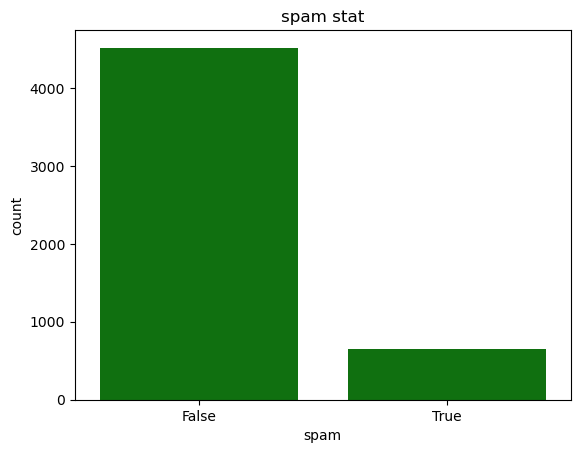

In [14]:
sns.countplot(x='spam',data=df,color='green')
plt.title('spam stat')
plt.show()

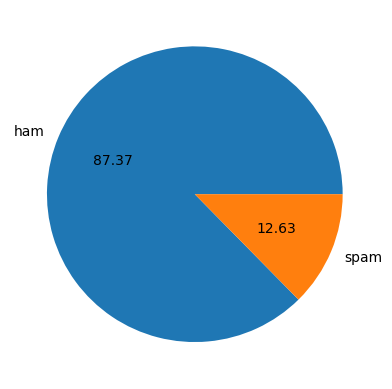

In [15]:
plt.pie(df['spam'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [16]:
!pip install nltk

In [17]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
df['num_carac']=df['text'].apply(len)

In [19]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df[df['spam']==True].describe()

,num_carac,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [22]:
df[df['spam']!=True].describe()

,num_carac,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_words', ylabel='Count'>

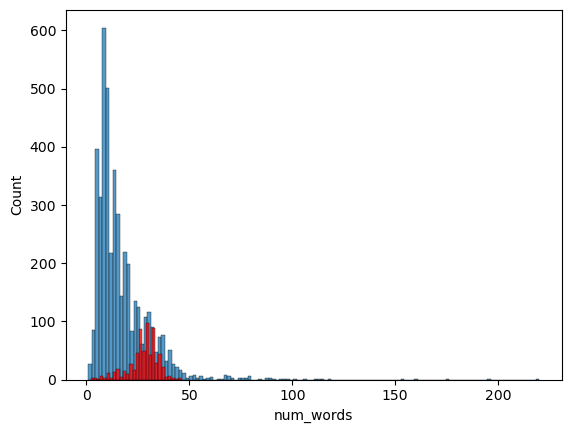

In [23]:
sns.histplot(df[df['spam']!=True]['num_words'])
sns.histplot(df[df['spam']==True]['num_words'],color='red')

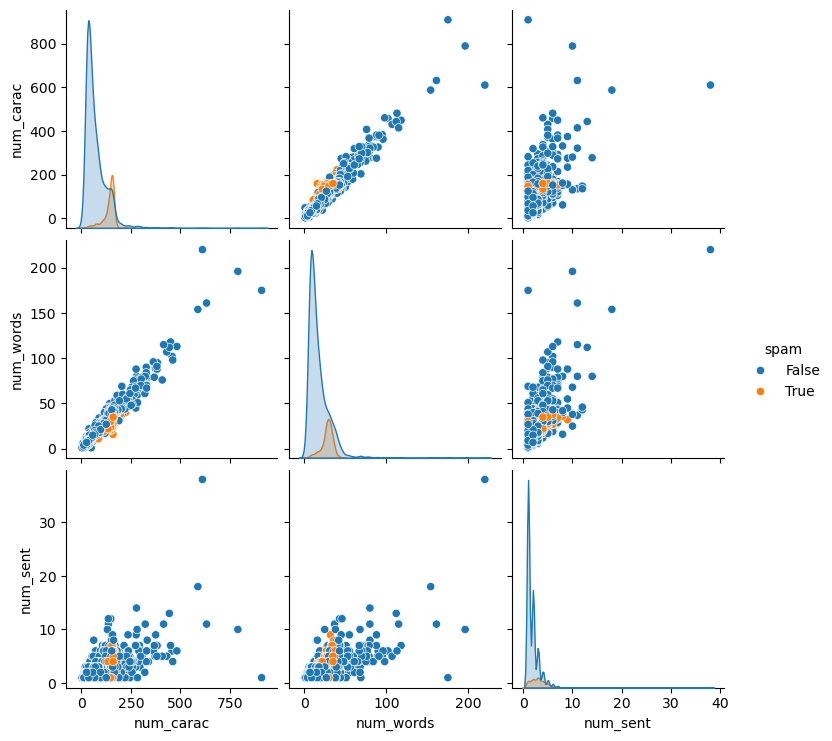

In [24]:
sns.pairplot(df,hue='spam')

In [25]:
df.sample()

,spam,text,num_carac,num_words,num_sent
3784,False,Let me know if you need anything else. Salad o...,98,22,2


In [26]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [28]:

def text_transf(text):
    y = []
    text = text.lower()
    text = nltk.word_tokenize(text)
    for c in text:
        if c.isalnum() and c not in stop_words and c not in string.punctuation:
            y.append(c)
    text = y[:]
    y.clear()
    for c in text:
        stemmer.stem(c)
        y.append(c)
    return " ".join(y)


In [29]:
len(df['text'][357])

148

In [30]:
text_transf(df['text'][357])

'ur currently 500 pounds maximize ur send cash 86688 cc 08708800282'

In [31]:
text_transf("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymore tonight k cried enough today'

In [32]:
df['transf_text']=df['text'].apply(text_transf)

In [33]:
df.head()

,spam,text,num_carac,num_words,num_sent,transf_text
0,False,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,False,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,True,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,False,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,False,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [34]:
spam_corpus =[]
for msj in df[df['spam']==True]['transf_text'].tolist():
    for word in msj.split():
        spam_corpus.append(word)

In [35]:
len(spam_corpus)

9941

In [36]:
from collections import Counter

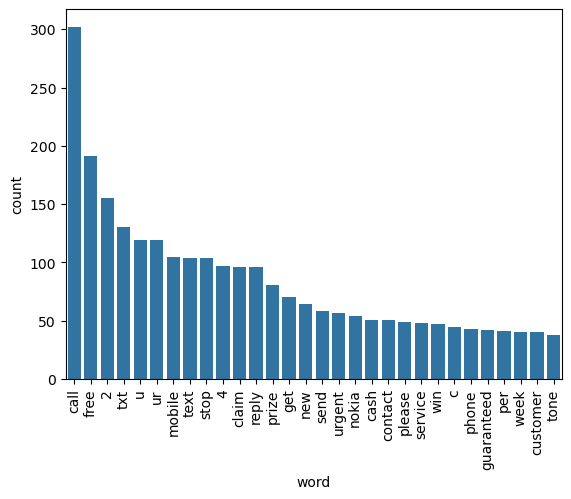

In [37]:
most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [38]:
ham_corpus =[]
for msj in df[df['spam']==False]['transf_text'].tolist():
    for c in msj.split():
        ham_corpus.append(c)
    

In [39]:
len(ham_corpus)

35305

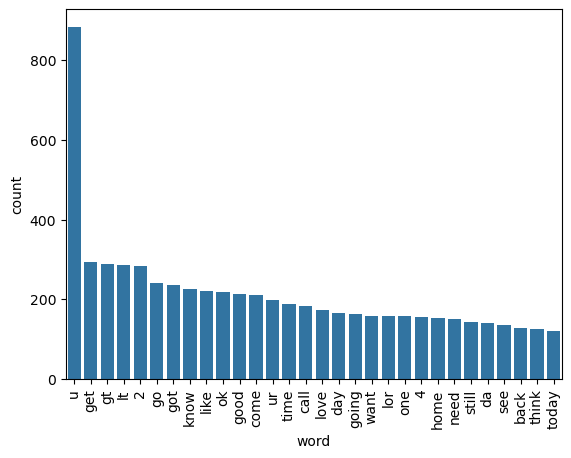

In [40]:
most_common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [42]:
X = tfidf.fit_transform(df['transf_text']).toarray()

In [43]:
X.shape

(5169, 3000)

In [44]:
y = df['spam'].values

In [45]:
y.astype(int)

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [48]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [49]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [50]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('confusin_matrix:',confusion_matrix(y_pred,y_test))
print('precision_score:',precision_score(y_pred,y_test))


accuracy_score: 0.8800773694390716
confusin_matrix: [[795  23]
 [101 115]]
precision_score: 0.8333333333333334


In [51]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print('accuracy_score:',accuracy_score(y_pred,y_test))
print('confusin_matrix:',confusion_matrix(y_pred,y_test))
print('precision_score:',precision_score(y_pred,y_test))

accuracy_score: 0.9748549323017408
confusin_matrix: [[896  26]
 [  0 112]]
precision_score: 0.8115942028985508


In [52]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[895   1]
 [ 18 120]]
0.9917355371900827


In [53]:
# tfidf --> MNB

In [54]:
# Then import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [55]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=10)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [56]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [57]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [58]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [59]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    x,y=train_classifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print("Accuracy - ",x)
    print("Precision - ",y)
    
    accuracy_scores.append(x)
    precision_scores.append(y)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9748549323017408
Precision -  1.0
For  DT
Accuracy -  0.9477756286266924
Precision -  0.8620689655172413
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9911504424778761


C:\Users\ahmed\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9369369369369369
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9112903225806451
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [61]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
2,NB,0.974855,1.000000
5,RF,0.973888,0.991150
8,ETC,0.977756,0.975207
0,SVC,0.975822,0.974790
4,LR,0.949710,0.938776
6,AdaBoost,0.960348,0.936937
7,BgC,0.965184,0.911290
9,GBDT,0.943907,0.900000
3,DT,0.947776,0.862069


In [62]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [63]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.904255
1,NB,Accuracy,0.974855
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.977756
4,SVC,Accuracy,0.975822
5,LR,Accuracy,0.949710
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.965184
8,GBDT,Accuracy,0.943907
9,DT,Accuracy,0.947776


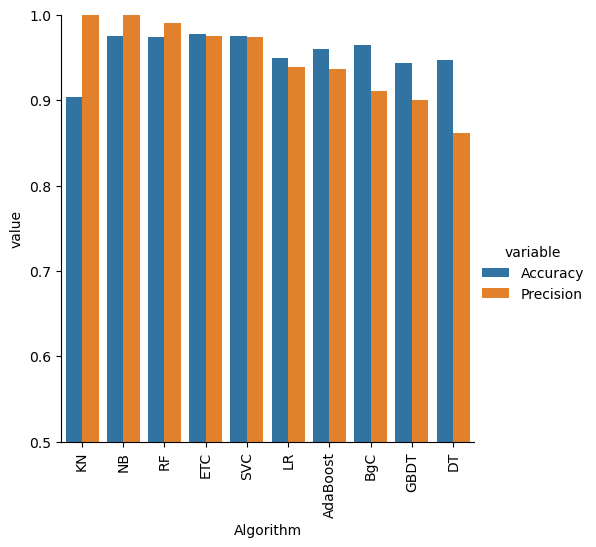

In [64]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

Model improve

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [66]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [67]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [68]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [69]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [70]:
from sklearn.ensemble import StackingClassifier

In [71]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [72]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9318181818181818


In [73]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))